In [25]:
import pandas as pd
import numpy as np
'''
    Lire et récuperer le fichier Online Sales Data avec la méthode read_csv de Pandas
'''

df = pd.read_csv("Online Sales Data.csv")

### Récupération des cinq premières et dernières lignes de la Dataframe pour avoir une idée sur les données

In [26]:
df.shape

(240, 9)

In [27]:
df.columns.to_list()

['Transaction ID',
 'Date',
 'Product Category',
 'Product Name',
 'Units Sold',
 'Unit Price',
 'Total Revenue',
 'Region',
 'Payment Method']

In [28]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [29]:
df.tail()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal
239,10240,2024-08-27,Sports,Yeti Rambler 20 oz Tumbler,2,29.99,59.98,Asia,Credit Card


### Jeter un coup d'oeil sur les information générales de notre Dataframe

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


### Chercher les valeurs nulles de la Dataframe 

In [31]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

### Changement de type de la colonne Date pour qu'elle soit en datetime64

In [32]:
print(df['Date'].dtype)

object


In [33]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


C:\Users\bouzi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


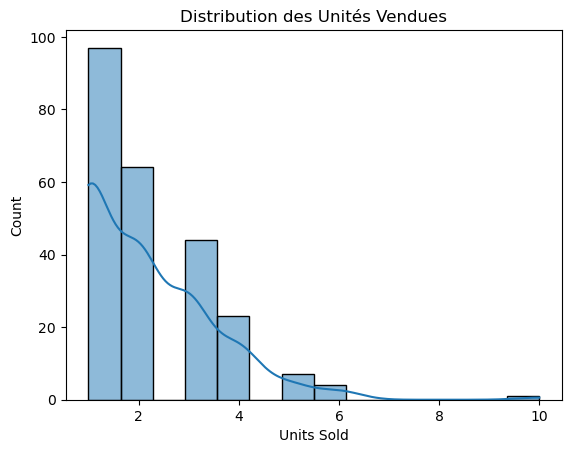

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Units Sold'], kde=True)
plt.title('Distribution des Unités Vendues')
plt.show()

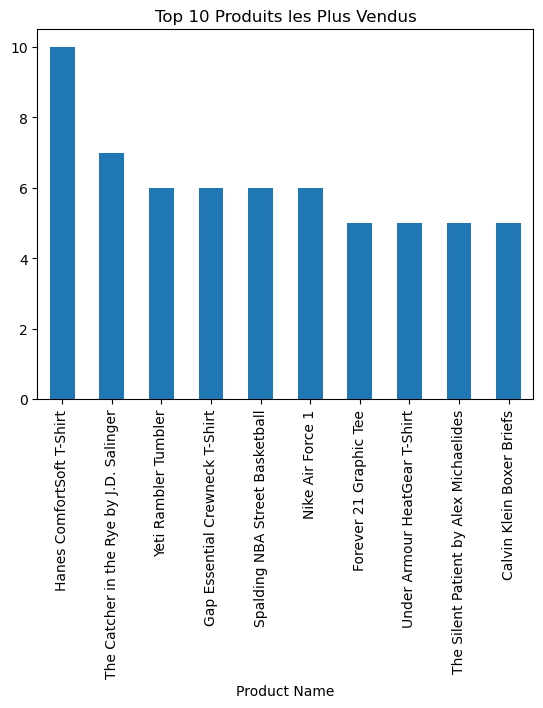

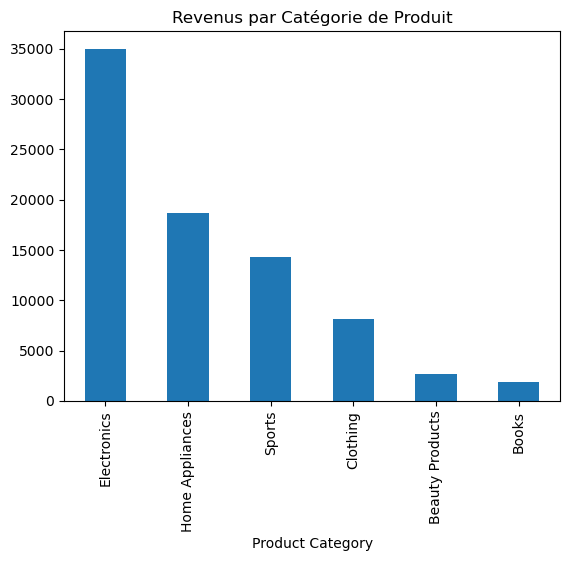

In [36]:
# Total des unités vendues par produit
product_sales = df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False)
#print(product_sales)

# Total des revenus par catégorie
category_revenue = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False)
#print(category_revenue)

# Visualisation
product_sales.head(10).plot(kind='bar')
plt.title('Top 10 Produits les Plus Vendus')
plt.show()

category_revenue.plot(kind='bar')
plt.title('Revenus par Catégorie de Produit')
plt.show()


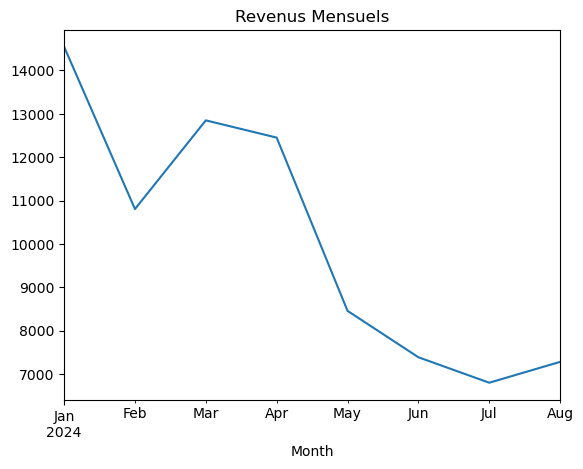

In [37]:
# Agréger les données par mois
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Revenue'].sum()

# Visualisation
monthly_sales.plot(kind='line')
plt.title('Revenus Mensuels')
plt.show()


Region
North America    36844.34
Asia             22455.45
Europe           21268.06
Name: Total Revenue, dtype: float64


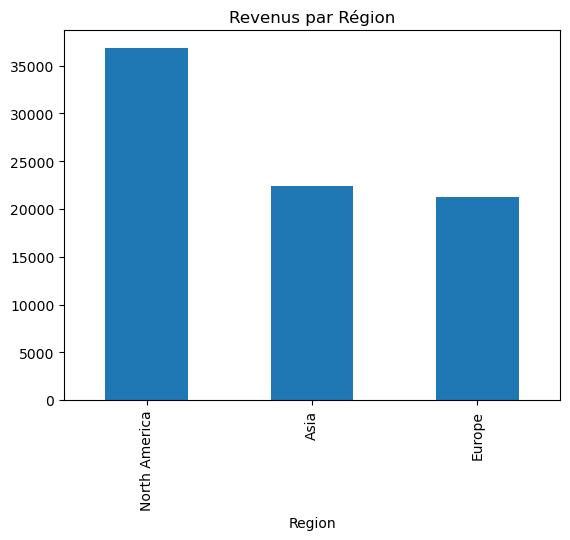

In [38]:
# Total des revenus par région
region_revenue = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
print(region_revenue)

# Visualisation
region_revenue.plot(kind='bar')
plt.title('Revenus par Région')
plt.show()


Corrélation entre le prix unitaire et les unités vendues : -0.30858262327014113


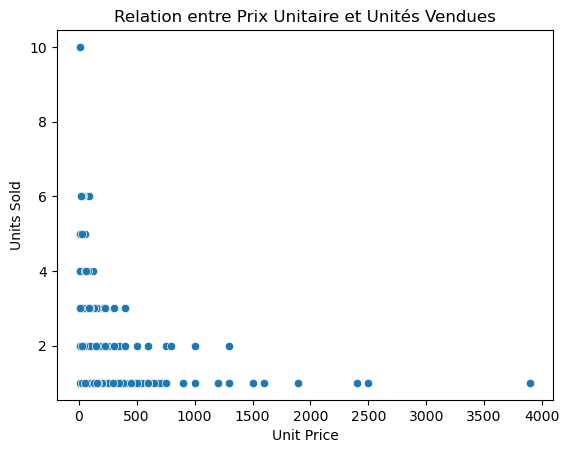

In [39]:
# Corrélation entre le prix unitaire et les unités vendues
correlation = df['Unit Price'].corr(df['Units Sold'])
print(f"Corrélation entre le prix unitaire et les unités vendues : {correlation}")

# Graphique de dispersion
sns.scatterplot(x='Unit Price', y='Units Sold', data=df)
plt.title('Relation entre Prix Unitaire et Unités Vendues')
plt.show()


Payment Method
Credit Card    120
PayPal          80
Debit Card      40
Name: count, dtype: int64


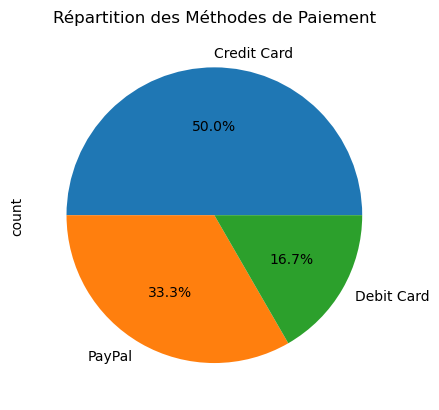

In [40]:
# Répartition des méthodes de paiement
payment_method_distribution = df['Payment Method'].value_counts()
print(payment_method_distribution)

# Visualisation
payment_method_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des Méthodes de Paiement')
plt.show()
